In [1]:
from fastai.tabular import *
from fastshap.interp import *

gets data

In [2]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['fnlwgt', 'education-num']
procs = [FillMissing, Normalize, Categorify]

## Tabular Classification

In [3]:
dls = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(800,1000)))
                           .label_from_df(cols='salary')
                           .databunch())

In [4]:
learn = tabular_learner(dls, layers=[200,100], metrics=accuracy)
learn.fit(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.374031,0.386227,0.830000,00:02


In [5]:
exp = ShapInterpretation(learn)

Classification model detected, displaying score for the class <50k.
(use `class_id` to specify another class)
Displaying row 8 of 128 (use `row_idx` to specify another row)


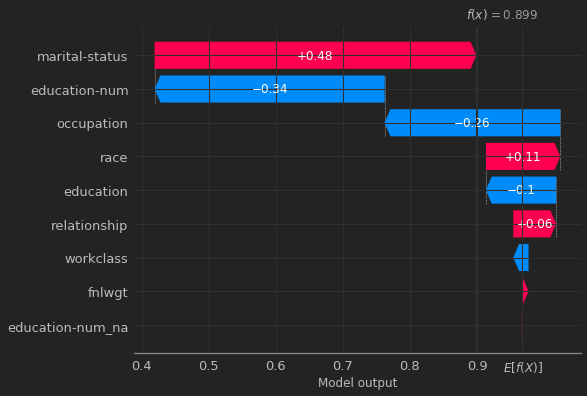

In [6]:
exp.waterfall_plot()

In [7]:
exp.force_plot()

Classification model detected, displaying score for the class <50k.
(use `class_id` to specify another class)


## Tabular Regression

train a regression model

In [13]:
dls = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(800,1000)))
                           .label_from_df(cols='age', label_cls=FloatList)
                           .databunch())

In [14]:
learn = tabular_learner(dls, layers=[200,100], metrics=mae)
learn.fit(1, 1e-2)

epoch,train_loss,valid_loss,mean_absolute_error,time
0,110.493034,107.915131,8.118365,00:03


In [19]:
exp = ShapInterpretation(learn, test_data=df.iloc[:100])

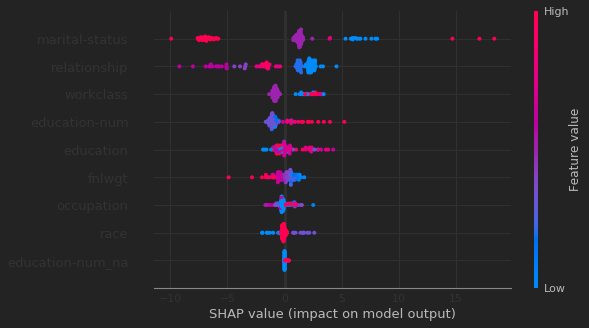

In [20]:
exp.summary_plot()

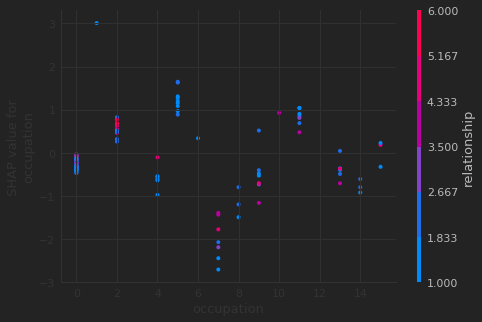

In [17]:
exp.dependence_plot(variable_name='occupation')

Displaying rows 0-9 of 128 (use `row_idx` to specify another row)


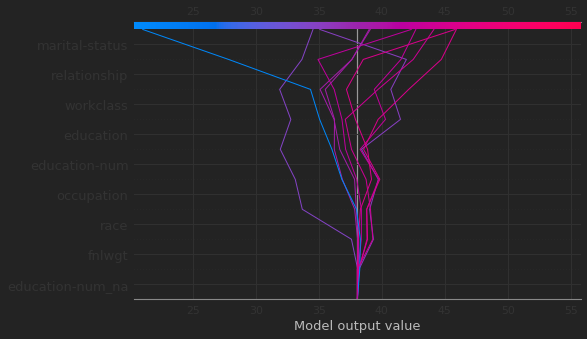

In [18]:
exp.decision_plot()